In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets
from mpl_toolkits.axisartist import SubplotZero
from IPython.display import YouTubeVideo
from matplotlib.patches import Ellipse, Rectangle
import numpy.ma as ma
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
from IPython.display import display, clear_output
mpl.rc('font', **{'family': 'serif', 'serif':['Computer Modern'], 'size': 18})
mpl.rc('text', usetex=True)

%matplotlib inline

In [2]:
def arrowed_spines(fig, ax, w_scl=40, l_scl=40):
    '''
    Solution provided in 
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    '''
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    ax.set_xticks([]) # labels 
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./w_scl*(ymax-ymin) 
    hl = 1./l_scl*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)
    
def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.HTMLMath(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + " Congratulations! You're right! " + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + " Wrong Anwser! Try again!" + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="Submit!")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])


def sbs(texts):
    btn_next = widgets.Button(description='Next')
    btn_back = widgets.Button(description='Back')
    btn_back.disabled = True
    texts_disps = []
    total_texts = len(texts)
    for text in texts:
        texts_disps.append(widgets.HTMLMath(text))
    for text_disp in texts_disps:
        text_disp.layout = widgets.Layout(display='none')

    global i_vis 
    i_vis = 0

    def update_vis(i_vis):
        if i_vis == total_texts:
            btn_next.disabled = True
        else:
            btn_next.disabled = False
        if i_vis != 0:
            btn_back.disabled = False
        else:
            btn_back.disabled = True

        for text_disp in texts_disps:
            text_disp.layout = widgets.Layout(display='none')
        for i in range(i_vis):
            try:
                texts_disps[i].layout.display = 'block'
            except:
                pass
    
    def clicked_btn_next(btn_object):
        global i_vis
        i_vis += 1
        update_vis(i_vis)
        
    def clicked_btn_back(btn_object):
        global i_vis
        i_vis -= 1
        update_vis(i_vis)
    
    btn_next.on_click(clicked_btn_next)
    btn_back.on_click(clicked_btn_back)
    bts = widgets.HBox([btn_back, btn_next])
    out = widgets.VBox(texts_disps + [bts], layout=widgets.Layout(width='100%', display='column-flex'))
    return out

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets
from mpl_toolkits.axisartist import SubplotZero
from IPython.display import YouTubeVideo
from matplotlib.patches import Ellipse, Rectangle
import numpy.ma as ma
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
from IPython.display import display, clear_output
mpl.rc('font', **{'family': 'serif', 'serif':['Computer Modern'], 'size': 18})
mpl.rc('text', usetex=True)

%matplotlib inline

# Overall Properties of Ceramic Materials

## What are the ceramic properties that come to mind?

Common thoughts:
1. Refractoriness
2. Fragile
3. Hard
4. Low Thermal Conductivity
5. Low Density

<table  style="background-color: inherit;     
   opacity: 1.0;  margin-left: auto;
  margin-right: auto;"><tr>
<td> <img src="https://prodigalplace.files.wordpress.com/2013/07/photo-broken-cup-iv.png" alt="Drawing" style="height: 250px;"/> </td>
<td> <img src="https://www.builddirect.com/learning-center/wp-content/uploads/2015/06/tile-cracked-needs-repair-sm.jpg" alt="Drawing" style="height: 250px;"/> </td>
</tr></table>

## Examples of Properties of *Advanced Ceramics*

### Ceramic Ribbons

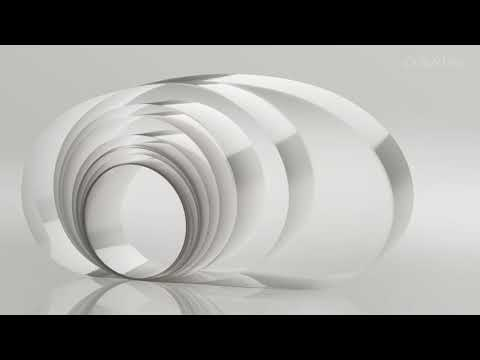

In [3]:
YouTubeVideo('UZOXI3F5F44', width=600, height=400)

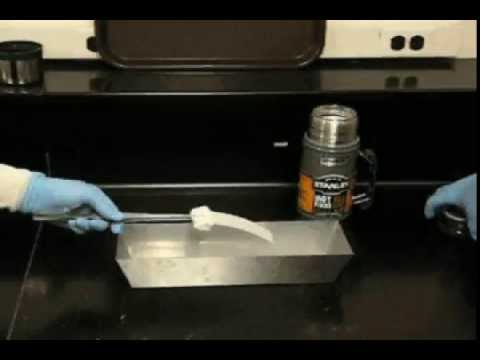

In [4]:
YouTubeVideo('bLq1FRvjrzw', width=600, height=400)

Alumina ribbon that is **flexible**, **resistant to thermal shocks**.

### Smartphone Screens

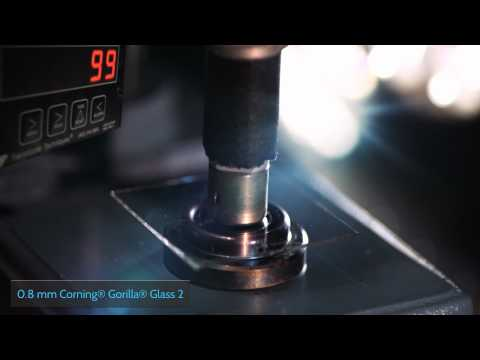

In [5]:
YouTubeVideo('wT8xI4PEU8c', width=600, height=400)

**High strength**

### Space Shuttle Thermal Tiles

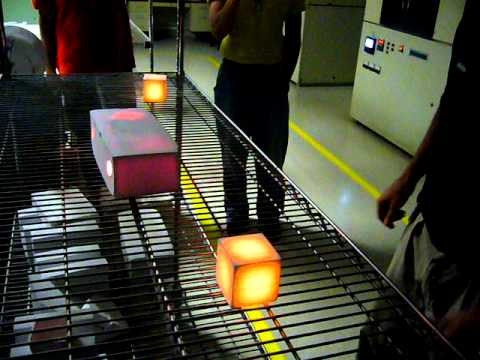

In [6]:
YouTubeVideo('Pp9Yax8UNoM', width=600, height=400)

**Thermal Properties** of the Space Shuttle tiles that protect it from the high temperature that results from the friction with the atmospheric air. 

### Important Remarks:

> Usually, we have common **assumptions** of the ceramic materials properties based on the **traditional materials** that are around us, such as ceramic tiles, glasses and bricks in the case of ceramic materials.

> One should **not** take the properties of such materials as the **standard** of its **whole class**.

> There are **advanced materials** around us everywhere too, however some times they are **hidden**, for example, your smartphone screen, all of it's sensor and multiple components that our daily lives usually depend on. That is the case for other materials classes too such as advanced engineering polymers and special alloys.

> One of the objective of this course is to **understand the fundamentals** that **enable** such advanced properties, correlate them and recognize they are not material-specific and, finally, instigate on the students the sense that **it is possible to develop advanced solutions even on traditional materials** when one understands the basic **underlying principles**.

## What are the properties that define the mechanical strength of the ceramics?


<span id="call-ref_3pt" class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://www.syalons.com/wp-content/uploads/2018/08/Modulus-of-Rupture-2.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" width="500" height="600" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figure 1:</b> Modulus of Rupture test of a ceramic material. <a href="#cit-ref_3pt">[1]</a>.</div> </span>

**The chemical bonds between the atoms of such material!** Formats, defects, porosity, all affect this property, but the fundamental property related to the mechanical strength is the chemical bonds

# How strong are chemical bonds?

## Lennard-Jones Model for Bonding Energy

The Lennard-Jones potential describes a model for the interaction between two particles. It is a simplified theoretical construction that considers both attractive and repulsive potentials. There are plenty of limitations regarding its applicability such as the fact that it does not consider the effect of neighbors particles.

Nonetheless, they can be of great importance to explain the behavior of different properties, as we shall see.

First, let's start by looking at its mathematical definition as shown by Equation (\ref{eq:lj}).

\begin{equation}\label{eq:lj}
U(r)=4 \epsilon\left[\left(\frac{\sigma}{r}\right)^{2 n}-\left(\frac{\sigma}{r}\right)^{n}\right]
\end{equation}


where $\epsilon$ is the **bonding energy**, $\sigma$ is the interatomic distance where the potential is zero, $n$ is a power coefficient related to the **Young Modulus**, and $r$ is the interatomic separation between two atoms.

The first term with the exponent $2n$ accounts for the repulsive interactions while the second one with the exponent $n$ is related to the attraction between the particles.

In the next cell one can see the effect of changing the bonding energy and the exponent coefficients, by changing its values using the sliders and also seeing their effect on the Young Modulus

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


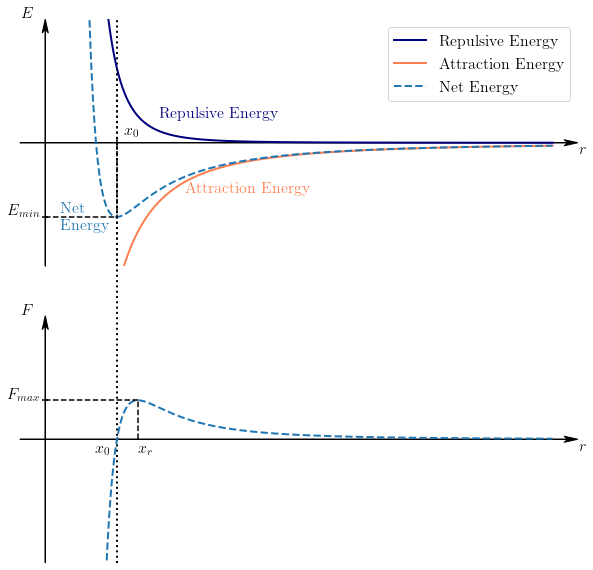

In [3]:
#HIDDEN
e = 6
n = 2
r = np.linspace(1e-2, 10, num=1000)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.set_facecolor('white') 
sigma = 1
R_E = 4*e*(((sigma/r)**(2*n)))
A_E = 4*e*((-(sigma/r)**n))
N_E = R_E + A_E
N_F = -4*e*(2*n*((sigma**(2*n)/r**(2*n+1)))-n*(sigma**(n)/r**(n+1)))
axs[0].plot(r, R_E, c='Navy', lw=2, label='Repulsive Energy')
axs[0].text(2.25, 2, 'Repulsive Energy', color='Navy', fontsize=16)
axs[0].plot(r, A_E, c='Coral', lw=2, label='Attraction Energy')
axs[0].text(2.75, -4, 'Attraction Energy', color='Coral', fontsize=16)
axs[0].plot(r, N_E, c='C0', lw=2, ls='--', label='Net Energy')
axs[0].text(0.3, -7., 'Net \n Energy', color='C0', fontsize=16)


axs[0].annotate('$r$', xy=(1, 0.5), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)
axs[0].annotate('$E$', xy=(0, 1.05), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)

axs[0].plot([r[N_E.argmin()], r[N_E.argmin()]], [0, N_E.min()], '--', c='k')
axs[0].text(-0.75, N_E.min(), r'$E_{min}$', color='k', fontsize=16)
axs[0].scatter(-0.005, [N_E.min()], marker='_', c='k')
axs[0].plot([0, r[N_E.argmin()]], [N_E.min(), N_E.min()], '--', c='k')
axs[0].scatter(r[N_E.argmin()], 0.075, marker='|', c='k')
axs[0].text(r[N_E.argmin()]*1.1, 0.5, r'$x_{0}$', color='k', fontsize=16)


axs[1].plot(r, N_F, c='C0', lw=2, ls='--', label='Net Energy')
# axs[1].plot(r, np.gradient(N_E, r), c='C0', lw=2, ls='--', label='Net Energy')
axs[1].plot([r[N_F.argmax()], r[N_F.argmax()]], [0, N_F.max()], '--', c='k')

axs[0].set_xlim(-0.5, 10.5)
axs[1].set_xlim(-0.5, 10.5)
axs[0].set_ylim(-10, 10)
axs[1].set_ylim(-10, 10)


axs[0].axvline(x=r[N_E.argmin()],ymin=0,ymax=1,c="k",linewidth=2,zorder=0, clip_on=False, ls=':')
axs[1].axvline(x=r[N_E.argmin()],ymin=0,ymax=2,c="k",linewidth=2,zorder=0, clip_on=False, ls=':')
r_ = np.linspace(r[N_E.argmin()], 10, 1000)

axs[1].annotate('$F$', xy=(0, 1.05), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)
axs[1].annotate('$r$', xy=(1, 0.5), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)
axs[1].text(r[N_E.argmin()]*0.7, -1.25, r'$x_{0}$', color='k', fontsize=16)
axs[1].text(r[N_F.argmax()], -1.25, r'$x_{r}$', color='k', fontsize=16)


axs[1].text(-0.75, N_F.max(), r'$F_{max}$', color='k', fontsize=16)
axs[1].scatter(-0.005, [N_F.max()], marker='_', c='k')
axs[1].plot([0, r[N_F.argmax()]], [N_F.max(), N_F.max()], '--', c='k')



arrowed_spines(fig, axs[0])
arrowed_spines(fig, axs[1])
axs[0].legend(fontsize=16)
plt.show()

This potential can be related to numerous properties, such as:

- Refractoriness
- Stiffness
- Hardness
- Thermal Expansion

We can visualize this relationships by seeing the effect of the Lennard-Jones coefficients on the Young modulus:

In [2]:
from ipywidgets import interactive, widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
mpl.rc('font', **{'family': 'serif', 'serif':['Computer Modern'], 'size': 18})
mpl.rc('text', usetex=True)
%matplotlib inline
def arrowed_spines(fig, ax, w_scl=40, l_scl=40):
    '''
    Solution provided in 
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    '''
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    ax.set_xticks([]) # labels 
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./w_scl*(ymax-ymin) 
    hl = 1./l_scl*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

def f(e, n, show_tangent):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    fig.set_facecolor('white') 
    r = np.linspace(1e-2, 10, num=1000)
    #e = 1
    sigma = 1
    U = 4*e*(((sigma/r)**(2*n))-(sigma/r)**n)
    axs[0].plot(r, U, lw=2, zorder=0, c='navy')
    axs[0].set_ylim(-10, 10)
    F = -4*e*(2*n*((sigma**(2*n)/r**(2*n+1)))-n*(sigma**(n)/r**(n+1)))
    axs[1].plot(r, F, c='Navy', lw=2, ls='-')
    axs[0].set_xlim(-0.5, 10.5)
    axs[1].set_xlim(-0.5, 10.5)
    axs[0].set_ylim(-12, 10)
    axs[1].set_ylim(-15, 40)
    axs[1].annotate('$F$', xy=(0, 1.05), xytext=(1, 0), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
    axs[1].annotate('$r$', xy=(1, 0.5), xytext=(1, 0), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
    arrowed_spines(fig, axs[1])

    if show_tangent:
        r_0 = r[U.argmin()]
        k = 4 * e * n**2/r_0**(n+1)
#         k = 
#         plt.plot(r[U.argmin()-20:U.argmin()], U[U.argmin()-20:U.argmin()], 'o')
        axs[0].plot(r[U.argmin()-30:U.argmin()+30], +k*(r[U.argmin()-30:U.argmin()+30]-r_0)**2+U.min(), c='coral', label=r'$\propto E$')
        k = 4 * e * n**2/r_0**(n+1)
        axs[1].plot(r[U.argmin()-30:U.argmin()+30], +k*(r[U.argmin()-30:U.argmin()+30]-r_0)+F[U.argmin()], c='coral', label=r'$\propto E$')
    axs[0].axvline(2**(1/n)*sigma, color='k', ls='--', label='$r_{min}$')
    axs[1].axvline(2**(1/n)*sigma, color='k', ls='--', label='$r_{min}$')

    

    axs[0].text(4.5, 3, r'$U(r)=4 \epsilon\left[\left(\frac{\sigma}{r}\right)^{2 \ n}-\left(\frac{\sigma}{r}\right)^{n}\right] \ \ \left[J = N \ m \right]$',
            fontsize=18)
    axs[1].text(4.5, 3, r'$F(r)= - \frac{d U(r)}{d r} \ \ \left[\frac{N \ m}{m} = N\right]$',
            fontsize=18)
    arrowed_spines(fig, axs[0], w_scl=40, l_scl=80)
    axs[0].annotate('$r$', xy=(1, 0.5), xytext=(1, 0), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
    axs[0].annotate('$U$', xy=(0, 1.05), xytext=(1, 0), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
    for ax in axs:
        ax.legend()
    plt.show()

interactive_plot = interactive(f, e=(2, 10, 0.5), n=(3, 9, 0.5),
                               show_tangent=widgets.ToggleButton(False, description='Show Young Modulus'))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
interactive_plot

interactive(children=(FloatSlider(value=6.0, description='e', max=10.0, min=2.0, step=0.5), FloatSlider(value=…

Some of the ideas on relating Young Modulus and interatomic forces where based on the work of UNSW, you may find more details on their web-page <a id="call-ref_syd" href="#cit-ref_syd">[2]</a>.

Now, we want to derive a relationship between the Lennard-Jones potential of a specific material and its mechanical strength. This will enable us to calculate the strength of a specific material. In order to do so, we may start by modeling the force with a widely known mathematical function, a sine wave:

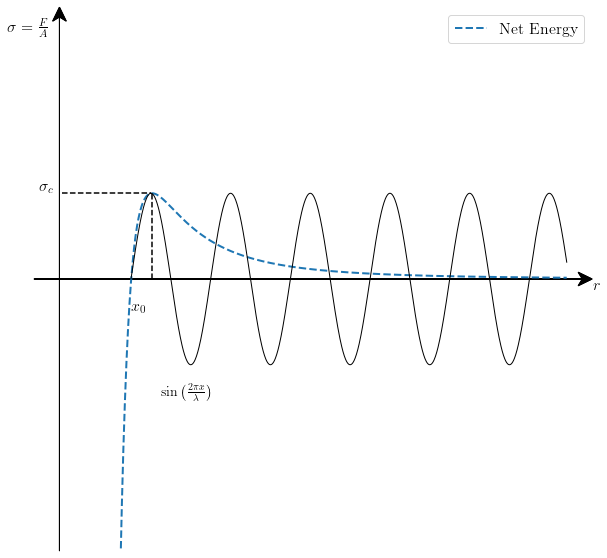

In [30]:
# plot
e = 6
n = 2
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
fig.set_facecolor('white') 

R_E = 4*e*(((sigma/r)**(2*n)))
A_E = 4*e*((-(sigma/r)**n))
N_E = R_E + A_E
N_F = -4*e*(2*n*((sigma**(2*n)/r**(2*n+1)))-n*(sigma**(n)/r**(n+1)))

axs.plot(r, N_F, c='C0', lw=2, ls='--', label='Net Energy')
# axs.plot(r, np.gradient(N_E, r), c='C0', lw=2, ls='--', label='Net Energy')
axs.plot([r[N_F.argmax()], r[N_F.argmax()]], [0, N_F.max()], '--', c='k')

axs.set_xlim(-0.5, 10.5)
axs.set_ylim(-10, 10)
axs.axhline(N_F.max(), xmin=0.05, xmax=0.21, ls='--', c='k')

r_ = np.linspace(r[N_E.argmin()], 10, 1000)
axs.plot(r_, N_F.max()*np.sin(4*(r_-r_[0])), c='k', lw=1)

axs.annotate(r'$\sigma = \frac{F}{A}$', xy=(-0.05, 0.975), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)
axs.annotate('$r$', xy=(1, 0.5), xytext=(1, 0), ha='left', va='top',
        xycoords='axes fraction', textcoords='offset points', fontsize=16)
axs.text(r[N_E.argmin()], -1.25, r'$x_{0}$', color='k', fontsize=16)
axs.text(2, -4.5, r'$\sin{\left(\frac{2 \pi x}{\lambda}\right)}$', color='k', fontsize=14)

axs.text(-0.4, N_F.max(), r'$\sigma_c$', color='k', fontsize=16)


arrowed_spines(fig, axs)
arrowed_spines(fig, axs)
axs.legend(fontsize=16)
plt.show()

We can find the following relationship:
\begin{equation}\label{eq:sin}
\sigma = \sigma_c \sin{\left( \frac{2 \pi x}{\lambda}\right)}
\end{equation}


We may recall some specific points of interest of the sine function:

- For $x=0$ → $\sin{(0)} = 0$;

- For $x=\frac{\lambda}{2}$ → $\sin{\left(\frac{\lambda}{2}\right)} = 0$;

- For $x=\frac{\lambda}{4}$ → $\sin{\left(\frac{\lambda}{4}\right)} = 1$ and $\sigma = \sigma_c$.

We may recall the Hooke's law of perfectly elastic materials:
\begin{equation}\label{eq:hooke}
\sigma =  E \epsilon \rightarrow \sigma=E \frac{x}{x_0}
\end{equation}

We can rearrange and consider the derivative of the stress with $x$:
\begin{equation}\label{eq:dhookedx}
\frac{d\sigma}{dx}=\frac{E}{x_0}
\end{equation}

We may also make use of the fact that the linear elasticity assumption is only valid for small deformations, thus, we may simplify Equation \ref{eq:sin} using the following approximation:

\begin{equation}\label{eq:sine_simp}
\sin{\left(\frac{2 \pi x}{\lambda}\right)} \approx  \frac{2 \pi x}{\lambda} \ \ \text{for} \ \ x << 1 
\end{equation}

We may check this in the following widget. As the parameter $\zeta$ increases, the argument of the sine function decreases, showing that it can be approximated with its own argument.

In [5]:
from ipywidgets import interact
def f(xsi):
    r = np.linspace(1e-2, 10, num=1000)
    plt.plot(r, np.sin(r*1/xsi), c='Navy', label=r'$\sin{\left(r \ \frac{1}{\xi} \right)}$')
    plt.plot(r, (r*1/xsi), c='coral', label=r'$r \ \frac{1}{\xi}$')
    plt.legend(fontsize=15)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

interactive_plot = interactive(f, xsi=widgets.FloatSlider(value=1,
                                                       min=1,
                                                       max=50,
                                                       step=0.5,
                                                       description=r'$\xi$',
                                                       readout_format='.2f'))
output = interactive_plot.children[-1]
output.layout.height = '270px'
interactive_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='$\\xi$', max=50.0, min=1.0, step=0.5), Output(layout…

With this approximation, Equation \ref{eq:sin} can be written as:

\begin{equation}\label{eq:sin_not_sin}
\sigma = \sigma_c \frac{2 \pi x}{\lambda}
\end{equation}

Which can also be differentiated with respect to $x$:
\begin{equation}\label{eq:dsindx}
\frac{d \sigma}{d x} = \sigma_c \frac{2 \pi}{\lambda} 
\end{equation}


We can equate Equations \ref{eq:dsindx} and \ref{eq:dhookedx}, which yields:

\begin{equation}\label{eq:sig_eq1}
\sigma_c \frac{2 \pi}{\lambda} = \frac{E}{x_0} 
\end{equation}

Solving for $\sigma_c$:

\begin{equation}\label{eq:sigma_c_close}
\sigma_c = \frac{E \lambda}{2 \pi x_0} \ \ \ \left[\frac{N/m^2 m}{m} = \frac{N}{m^2} = Pa \right]
\end{equation}

There are some points to be addressed yet:
- How to measure $x_0$?
- How to measure $E$?
- Is there any physical sense to $\lambda$? If so, what is it?

In order:

> The value $x_0$ is in fact the lattice parameter of the crystal of the material we are studying. It is the equilibrium distance between the atoms or molecules. We can measure it by X-Ray diffraction, for example or using direct image through Transition Electron Microscopy (TEM) or Atomic Force Microscopy (AFM).

> The Young modulus may be measured through multiple techniques such as static mechanical tests, Digital Imaging Technique or by non-destructive tests such as Impulse Excitation Technique, for some examples.

> Now the $\lambda$ parameter is a mathematical artifact. We need to find a way to remove this from our methodology. One possible strategy is to consider the work of fracture, also known as fracture energy.


# Fracture Energy

<span id="call-ref_bamb" class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://i.kinja-img.com/gawker-media/image/upload/s--gZxCVIAe--/c_scale,f_auto,fl_progressive,q_80,w_800/wpwhbbbxxivrk7qwbfwr.jpg" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="caption" align="center" width="500" height="600" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figure 2:</b> Fracture pattern of a Bamboo chopstick <a href="#cit-ref_bamb">[3]</a>.</div> </span>


\begin{equation}\label{eq:gama_wof}
\gamma_{wof} = \int{\sigma dx} = \int_0^{\lambda/2}{\sigma_c \sin{\left(\frac{2 \pi x}{\lambda}\right)} dx} \ \ \left[ \frac{N}{m^2} \ m\right] = \left[ \frac{J}{m^2} \right]
\end{equation}



Remembering that:

\begin{equation}\label{eq:sin_int}
\int{\sin{\left( a \ x \right)} dx} = - \frac{1}{a} \cos{\left( a \ x \right)}
\end{equation}


We find:
\begin{equation}
\begin{array}
\int
\gamma_{wof} &=\int_0^{\lambda/2}{\sigma_c \sin{\left(a x \right)} dx} = \sigma_c \int_0^{\lambda/2}{ \sin{\left(a x \right)} dx} = - \dfrac{\sigma_c}{a} \cos{\left( a x \right)}\vert_0^{\lambda/2} \\
  & = - \dfrac{\sigma_c \lambda}{2 \pi} \cos{\left( \dfrac{\sigma_c \lambda}{2 \pi} x \right)}\big|_0^{\lambda/2} \\
  & = - \dfrac{\sigma_c \lambda}{2 \pi} \cos{\left( \dfrac{\sigma_c \lambda}{2 \pi} \dfrac{\lambda}{2} \right)} +
  \dfrac{\sigma_c \lambda}{2 \pi} \cos{\left( \dfrac{\sigma_c \lambda}{2 \pi} 0 \right)} \\
  & = \dfrac{\sigma_c \lambda}{\pi}
\end{array}
\end{equation}



We can isolate the non-physical $\lambda$ in terms of the fracture energy, $\gamma_{wof}:
\begin{equation}\label{eq:lambda}
\frac{\lambda}{\pi} = \frac{\gamma_{wof}}{\sigma_c}
\end{equation}

We can also isolate such quantity in Equation \ref{eq:sigma_c_close}:

\begin{equation}\label{eq:sigma_c_close_lam}
\frac{\lambda}{\pi} = \frac{\sigma_c x_0}{E}
\end{equation}


Equating such expressions yields:

\begin{equation}\label{eq:no_lambda}
\frac{\sigma_c x_0}{E} = \frac{\gamma_{wof}}{\sigma_c}
\end{equation}

Assuming that $\gamma_{wof} = 2 \gamma_0$ and solving for $\sigma_c$:
\begin{equation}\label{eq:sigma_th}
\sigma_c = \sigma_{th} = \sqrt{\dfrac{\gamma_0 E}{x_0}}
\end{equation}
which is the theoretical strength of the material!

To summarize, we started from the Lennard-Jones model for potential energy between two particles, modeled it as a sine wave, worked our way algebraically to remove terms with no clear physical meaning and found that the theoretical strength of the materials can be related to its surface energy, it's Young modulus and it's lattice parameter.

For an example, let's use this Equation to calculate the theoretical strength of Alumina:

In [8]:
from ipywidgets import interact, widgets

tab = widgets.Tab()
tab.set_title(0, 'Example 1')
title = widgets.HTML('<b>Calculation of Alumina Theoretical Strength:</b>')
description = widgets.HTMLMath('Alumina (Al<sub>2</sub>O<sub>3</sub>) has a Young Modulus, $E$, of approximately 400GPa, with a surface energy, $\gamma_0$ of 1.2 J/m<sup>2</sup> and a lattice parameter, $x_0$ of 4x10<sup>-10</sup> m.')

part1 = 'The theoretical strength can be calculate with Equation 16, that is:'
part2 = '$\sigma_{th} = \sqrt{\dfrac{\gamma_0 E}{x_0}}$'
part3 = 'Substituting the values:'
part4 = '$\sigma_{th} = \sqrt{\dfrac{1.2 \ x \ 400x10^9}{4x10^{-10} }}$'
part5 = r'$\sigma_{th} \approx 40 $ GPa'

parts = [part1, part2, part3, part4, part5]
ex = sbs(parts)
ex.children = tuple([title, description]+list(ex.children))
tab.children = [ex]
tab

<span id="call-ref_ash" class="img_container center" style="display: inline_block; vertical-align: top; text-align: center;" > <img alt="test" src="https://176863c84d58dd0d250c-0a97ac00c0c5c2a76ca48b133cb26bb6.ssl.cf1.rackcdn.com/2017/05/specific_strength_crop-1024x782.png" style="display:block; margin-left: auto; margin-right: auto; text-align: left;" title="Ashby Plot" align="center" width="500" height="600" /> <div class="img_caption" style="border-style: solid; border-width: 2px; border-radius: 5px; border-color:lightgrey; padding: 2px 5px; text-align: left; width=980px"><b>Figure 2:</b> Ashby materials selection chart of specific strength versus specific modulus <a href="#cit-ref_ash">[4]</a>.</div> </span>


Just for reference, we may use an Ashby plot to see ordinary values of the strength of materials. Alumina's density is 3950 kg/m<sup>3</sup>, thus, its strength is at most 400MPa! The difference between experimental, $\sigma_{exp}$ and theoretical $\sigma_{th}$ values is 100 times! In some materials it can reach 1000.


But what is the reason why $\sigma_{exp}$ is so lower than the expected $\sigma_{th}$?

To get some insight lets consider an hypothetical tensile test with two different samples, $S_1$ and $S_2$, which broke when the applied force reached $F_1$ and $F_2$, respectively:

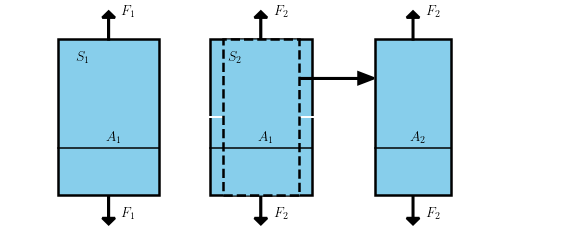

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))

r1 = Rectangle([0, 0], 0.2, 1, ec='k', lw=2.5, fc='skyblue')
plt.text(0.035, 0.85, '$S_1$', fontsize=14)

ax.add_patch(r1)
plt.plot([0, 0.2], [0.3, 0.3], c='k', lw=1.5)
plt.text(0.095, 0.34, '$A_1$', fontsize=14)
ax.arrow(0.1, -0.01, 0, -0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125, -0.15, '$F_1$', fontsize=14)
ax.arrow(0.1, 1, 0, 0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125, 1.15, '$F_1$', fontsize=14)


r2 = Rectangle([0.3, 0], 0.2, 1, ec='k', lw=2.5, fc='skyblue')
plt.text(0.3+0.035, 0.85, '$S_2$', fontsize=14, zorder=9)
ax.add_patch(r2)
plt.plot([0+0.3, 0.2+0.3], [0.3, 0.3], c='k', lw=1.5, zorder=9)

plt.text(0.095+0.3, 0.34, '$A_1$', fontsize=14, zorder=9)
ax.arrow(0.1+0.3, -0.01, 0, -0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125+0.3, -0.15, '$F_2$', fontsize=14)
ax.arrow(0.1+0.3, 1, 0, 0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125+0.3, 1.15, '$F_2$', fontsize=14)


plt.plot([0.3, 0.325], [0.5, 0.5], c='w', lw=2, zorder=4)
plt.plot([0.475, 0.51], [0.5, 0.5], c='w', lw=2, zorder=4)

r3 = Rectangle([0.325, 0], 0.15, 1, ec='k', lw=2.5, ls='--', fc='skyblue', zorder=8)
ax.add_patch(r3)

plt.text(0.095+0.6, 0.34, '$A_2$', fontsize=14)
ax.arrow(0.1+0.6, -0.01, 0, -0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125+0.6, -0.15, '$F_2$', fontsize=14)
ax.arrow(0.1+0.6, 1, 0, 0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125+0.6, 1.15, '$F_2$', fontsize=14)

r4 = Rectangle([0.625, 0], 0.15, 1, ec='k', lw=2.5, fc='skyblue')
ax.add_patch(r4)
plt.plot([0.625, 0.775], [0.3, 0.3], c='k', lw=1.5, zorder=9)

# r5 = Rectangle([0.6, 0], 0.2, 1, ec='k', lw=2.5, fc='none', ls='--')
# ax.add_patch(r5)
ax.arrow(0.4775, 0.75, 0.15-0.035, 0.00, head_width=0.075, head_length=0.03,
          lw=2.5, fc='k')

ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.2, 1.2)

ax.axis('off')
plt.show()

We may calculate the failure stresses as: $$\sigma_{f,1} = \dfrac{F_1}{A_1}$$ or $$\sigma_{f,2} = \dfrac{F_2}{A_1}$$ or considering only the portion of the second sample with no defect, thus: $$\sigma_{f,3} = \dfrac{F_2}{A_2}$$

In [6]:
question = '''
          Which affirmation is right?
          
          <p>I)   $\sigma_{f, 1} = \sigma_{f, 2}$</p>
          
          <p>II)  $\sigma_{f, 1} \gt \sigma_{f, 2}$</p>
          
          <p>III) $\sigma_{f, 1} = \sigma_{f, 3}$</p>
          
          <p>IV) $\sigma_{f, 1} \gt \sigma_{f, 3}$</p>
          
          '''
Q1 = create_multipleChoice_widget(question,['I','II','III', 'IV', 'II and III', 'II and V'], 'II and V')
Q1.layout = widgets.Layout(display='flex',
                               flex_flow='column',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
display(Q1)

The defects act concentrating stress, thus the force to break the samples will be lower for the one with defect, yielding $\sigma_{f, 1} \gt \sigma_{f, 2}$. Furthermore, even if we only consider the region without the defect, as it concentrates the stress ahead of it, the failure stress for the sample with no defect will still be higher than if we consider only the region with no defect, thus, $\sigma_{f, 1} \gt \sigma_{f, 3}$.

It turns out that something acts as a multiplier of the stress applied, providing a local load that surpasses the theoretical value. This something is the stress concentration factor, more popularly known as defects.

# Stress Concentration Factor

In order to understand how the defects acts as stress concentration factors we will make use of an abstraction of the internal reactive forces inside the material, we will call them as force lines. A force line depicts the internal force acting within a body across imaginary internal surfaces. The more dense the distribution of the line forces in a specific region, the higher the stress concentration in it.

Let's see them for a material under tensile tension. First click on the "Plot Force Lines" button for a material with no defects.

You will see a set of force lines. After this, deactivate the visualization of the force lines and add a defect on the material. You will be able to change the curvature radius of the defect, but before that, plot the force lines again by clicking the "Plot Force Lines" button.

What do you see?

What are the effect on the force lines?

Can you relate this to what happens inside the material?

Now, uncheck the Plot Force Lines and play with the slider of the radius of curvature. Every time you are curios, feel free to plot the force lines.

***Obs.: This order of interaction is just to avoid long times for rendering the force lines.***

In [39]:
def circle(C, R):
    t=np.linspace(0,2*np.pi, 200)
    return C+R*np.exp(1j*t)
def Juc(z, lam):#Joukowski transformation
    return z+(lam**2)/z

def deg2radians(deg):
    return deg*np.pi/180

def compute_lines(rho):
    '''
    Based on the Joukowski transformation of the potential flow past a cylinder.
    For reference:
    https://people.eng.unimelb.edu.au/asho/PotentialFlow/notes.pdf
    https://github.com/luca6331/joukowskiAirfoilVisualization/blob/master/Report.pdf
    https://nbviewer.jupyter.org/github/empet/Math/blob/master/Joukowski-airfoil.ipynb
    
    '''

    V_inf = 1
    R = 1
    lam = (R**2 + R*rho/2 - R*(8*R*rho + rho**2)**0.5/2)**0.5
    alpha=deg2radians(0) # angle of attack
    beta=deg2radians(0)  # -beta is the argument of the complex no (Joukovski parameter - circle center)
    center_c= 0 # Center of the circle
    x=np.arange(-3.5, 3.5, 0.1)
    y=np.arange(-5, 5, 0.1)
    x,y=np.meshgrid(x,y)
    z=x+1j*y
    z=ma.masked_where(np.absolute(z-center_c)<=R, z)
    Z=z-center_c
    Z = -1j*Z
    Gamma=-4*np.pi*V_inf*R*np.sin(beta+alpha)
    U=np.zeros(Z.shape, dtype=np.complex)
    with np.errstate(all='ignore'):#avoid warning when evaluates np.log(0+1jy).
                                         #In this case the arg is arctan(y/0)+cst
            for m in range(Z.shape[0]):
                for n in range(Z.shape[1]):
                    #U[m,n]=Gamma*np.log(Z[m,n]/R)/(2*np.pi)# 
                     U[m,n]=Gamma*np.log((Z[m,n]*np.exp(-1j*alpha))/R)/(2*np.pi)
    c_flow= V_inf*Z*np.exp(-1j*alpha) + (V_inf*np.exp(1j*alpha)*R**2)/Z - 1j*U #the complex flow
    J=Juc(z, lam)
    Circle=circle(0, R)
    Airfoil=Juc(Circle, lam)# airfoil 
    return J, c_flow.imag, Airfoil, rho

In [7]:
from ipywidgets import interact
np.seterr(all='ignore')
def f(rho, defect, show_lines):
    fig, ax = plt.subplots(figsize=(6, 6))
    r = Rectangle([-3.5, -4.75], 6.95, 9.5, facecolor='none', edgecolor='k', zorder=10)
    if not defect:
        if not show_lines:
            ax.add_patch(r)

            
        if show_lines:
            xcoords = np.linspace(-3.5, 3.5, 50)
            ax.add_patch(r)
            for xc in xcoords:
                perf = plt.axvline(x=xc, c='blue', lw=1)
                perf.set_clip_path(r)
    if defect: 
        if not show_lines:
            R = 1
            lam = (R**2 + R*rho/2 - R*(8*R*rho + rho**2)**0.5/2)**0.5
            c = 1
            b = c*rho**0.5
            Circle=circle(0, R)
            Airfoil=Juc(Circle, lam)
            ax.plot(Airfoil.real, Airfoil.imag, c='k')
            ax.add_patch(r)

        if show_lines:
            J, stream_func, Airfoil, rho = compute_lines(rho)
            cp=ax.contour(J.real, J.imag, stream_func,levels=100, colors='blue', linewidths=1,
                            linestyles='solid')# this means that the flow is evaluated at Juc(z) since c_flow(Z)=C_flow(csi(Z))
            ax.add_patch(r)

            for col in cp.collections:
                col.set_clip_path(r)
            ax.plot(Airfoil.real, Airfoil.imag, c='k')
            ax.set_xlim(-5.5, 5.5)
            ax.set_ylim(-5.5, 5.5)
        
    plt.annotate('', xy = (0, 4.725), \
        xytext = (0, 5.5), fontsize = 20, \
        color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<-'))
    plt.text(0.25, 5.25, r'$\sigma_{app}$', fontsize=14)
        
    plt.annotate('', xy = (0, -4.725), \
        xytext = (0, -5.5), fontsize = 20, \
        color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<-'))
    plt.text(0.25, -5.5, r'$\sigma_{app}$', fontsize=14)

    ax.axis('off')
    ax.set_xlim(-5.5, 5.5)
    ax.set_ylim(-5.5, 5.5)
    plt.show()

interactive_plot = interactive(f, show_lines=widgets.ToggleButton(False, description='Plot Force Lines'),
                               rho=widgets.FloatSlider(value=5,
                                                       min=0.01,
                                                       max=1,
                                                       step=0.01,
                                                       description=r'$\rho$',
                                                       readout_format='.2f'),
                                defect=widgets.ToggleButton(False, description='Add defect'))
output = interactive_plot.children[-1]
output.layout.height = '360px'
interactive_plot.layout = widgets.Layout(display='flex',
                               flex_flow='column-reverse',
                               align_items='center',
                               align_content='center',
                               justify_content='center',
                               width='100%')
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='$\\rho$', max=1.0, min=0.01, step=0.01), ToggleButto…

The direct consequence of this behavior is that the stress "felt" on the defect tip is multiplied by a constant, the stress concentration factor $K_t$, as we can see below:

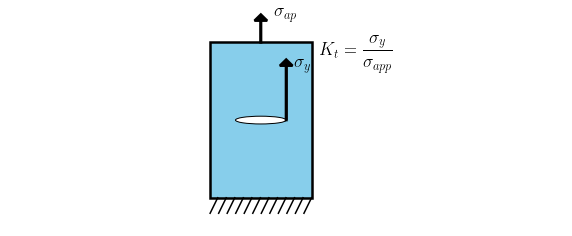

In [47]:
fig, ax = plt.subplots(figsize=(10, 4))


r2 = Rectangle([0.3, 0], 0.2, 1, ec='k', lw=2.5, fc='skyblue')
# plt.text(0.3+0.045, 0.85, '$S_2$', fontsize=18, zorder=9)
ax.add_patch(r2)
# plt.plot([0+0.3, 0.2+0.3], [0.3, 0.3], c='k', lw=1.5, zorder=9)
e1 = Ellipse([0.4, 0.5], 0.1, 0.05, zorder=9, fc='w', ec='k')
ax.add_patch(e1)
for i in np.linspace(0.3, 0.5-0.015, 12):
    plt.plot([i, i+0.015], [-0.1, 0], c='k', lw=1.5, zorder=9)


# plt.text(0.095+0.3, 0.34, '$A_1$', fontsize=18, zorder=9)
# ax.arrow(0.1+0.3, -0.01, 0, -0.14, head_width=0.025, head_length=0.04,
#           lw=2.5, fc='k')
# plt.text(0.125+0.3, -0.15, '$F_2$', fontsize=18)
ax.arrow(0.1+0.3, 1, 0, 0.14, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k')
plt.text(0.125+0.3, 1.15, '$\sigma_{ap}$', fontsize=18)

ax.arrow(0.1+0.3+0.05, 0.5, 0, 0.35, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k', zorder=11)
plt.text(0.125+0.3+0.04, 0.825, '$\sigma_{y}$', fontsize=18)

plt.text(0.515, 0.825, r'$K_t = \displaystyle \frac{\sigma_{y}}{\sigma_{app}}$', fontsize=18)

# plt.plot([0.3, 0.325], [0.5, 0.5], c='w', lw=2, zorder=4)
# plt.plot([0.475, 0.51], [0.5, 0.5], c='w', lw=2, zorder=4)

ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.2, 1.2)

ax.axis('off')
plt.show()

For a cylindric defect, $K_t=3$ and we can analytically calculate the stress distribution around it, as seen in the blue curve below:

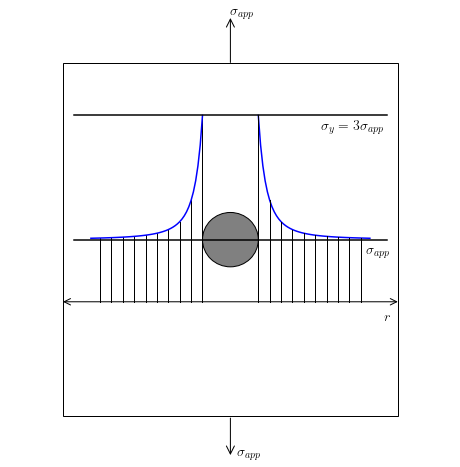

In [48]:
fig = plt.figure(figsize=(8, 8))
a = 0.01
b = 0.02
c = a
e = Ellipse([0, 0], 2*c, 2*c,  facecolor='grey', edgecolor='k', zorder=10)
plt.gca().add_artist(e)
r = Rectangle([-0.06, -0.065], 0.12, 0.13, facecolor='w', edgecolor='k')
plt.gca().add_artist(r)

plt.ylim(-0.08, 0.08)
plt.xlim(-0.08, 0.08)
# plt.axvline(c, ymin=0.1, ymax=0.9, c='k', lw=0.5, ls='--', zorder=3)
# plt.axvline(-c, ymin=0.1, ymax=0.9, c='k', lw=0.5, ls='--', zorder=3)
plt.axis('off')

xs = np.linspace(a, 0.05)
sigma_ap = 0.05
theta = np.pi/2
sig_rr = lambda r: sigma_ap / 2 * (1 + (a / r)**2) - sigma_ap / 2 * (1 + 3 * (a / r)**4) * np.cos(2*theta)

ax_2 = plt.gca().twinx()
ax_2.plot(xs, sig_rr(xs)+0.125, c='blue')
for x, y in zip(xs[::5], sig_rr(xs)[::5]):
    plt.plot([x, x], [0.125, y+0.125], lw=1, c='k')
    plt.plot([-x, -x], [0.125, y+0.125], lw=1, c='k')

ax_2.plot(-xs, sig_rr(xs)+0.125, c='blue')
ax_2.axhline(sigma_ap+0.125, xmin=0.15, xmax=0.85, c='k', lw=1.5, ls='-')
ax_2.axhline(3*sigma_ap+0.125, xmin=0.15, xmax=0.85, c='k', lw=1.5, ls='-')
ax_2.set_ylim(0, 0.35)
ax_2.axis('off')
plt.annotate('', xy = (-0.06, 0.125), \
    xytext = (0.06, 0.125), fontsize = 16, \
    color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<->', shrinkA = 0, shrinkB = 0))
plt.text(0.055, 0.110, '$r$', fontsize=14)
plt.text(0.0485, sigma_ap-0.0125+0.125, r'$\sigma_{app}$', fontsize=14)
plt.text(0.0325, 3*sigma_ap-0.0125+0.125, r'$\sigma_y = 3 \sigma_{app}$', fontsize=14)

plt.text(0, 0.355, r'$\sigma_{app}$', fontsize=14)
plt.annotate('', xy = (0, 0.316), \
    xytext = (0, 0.355), fontsize = 20, \
    color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<-'))
# plt.arrow(0, 0.338, 0, 0.005, width=0.0005)

plt.text(0.0025, 0, r'$\sigma_{app}$', fontsize=14)
plt.annotate('', xy = (0, 0), \
    xytext = (0, 0.033), fontsize = 20, \
    color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '->'))
# plt.arrow(0, 0.338, 0, 0.005, width=0.0005)
plt.show()

<div id="call-ref_fmorg"></div>

For an elliptical defect, as we saw earlier, Charles E. Inglis found a specific value for $K_t$.
His solution can be found in the [original publication](https://imechanica.org/files/1913%20Inglis%20Stress%20in%20a%20plate%20due%20to%20the%20presence%20of%20cracks%20and%20sharp%20corners_0.pdf). For further information, check
<a href="#cit-ref_fmorg">[5]</a>. Considering this lesson, the important result is that: 
\begin{equation}\label{eq:K_t}
K_t = \left(1 + 2 \dfrac{c}{b} \right)
\end{equation}

Defining the radius of curvature, $\rho$, as the biggest circle that touches the ellipse in a single point we can have a parameter that is related to the shape of this defect. Considering the ellipse's height and width, $2b$ and $2c$, respectively, we find:

\begin{equation}\label{eq:radius_of_curv}
\rho = \dfrac{b^2}{c}
\end{equation}

Thus:

\begin{equation}\label{eq:K_t_ell}
K_t = \left(1 + 2 \sqrt{\dfrac{c}{\rho}} \right)
\end{equation}

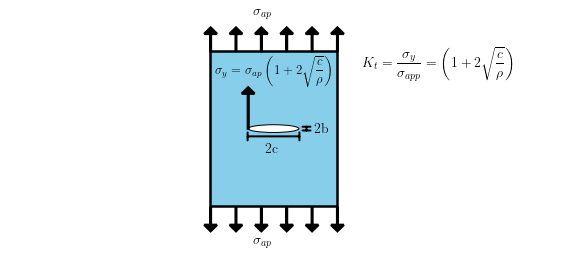

In [58]:
fig, ax = plt.subplots(figsize=(10, 4))


r2 = Rectangle([0.3, 0], 0.25, 1, ec='k', lw=2.5, fc='skyblue')
# plt.text(0.3+0.045, 0.85, '$S_2$', fontsize=14, zorder=9)
ax.add_patch(r2)
# plt.plot([0+0.3, 0.2+0.3], [0.3, 0.3], c='k', lw=1.5, zorder=9)
e1 = Ellipse([0.425, 0.5], 0.1, 0.05, zorder=9, fc='w', ec='k')
# plt.arrow(0.4, 0.4, 0.075, 0, head_width=0.075, head_length=0.0,
#           ec='k', lw=2.5, fc='k', zorder=9, stylr='')

plt.annotate(s='', xy=(0.345+0.025,0.45), xytext=(0.455+0.025,0.45),
             arrowprops=dict(arrowstyle='|-|, widthA=0.4,widthB=0.4', linewidth=2))

plt.text(0.325+0.115/2+0.025, 0.35, '2c', fontsize=14)


plt.annotate(s='', xy=(0.49, 0.475), xytext=(0.49,0.525),
             arrowprops=dict(arrowstyle='|-|, widthA=0.4,widthB=0.4', linewidth=2))

plt.text(0.505, 0.475, '2b', fontsize=14)

ax.add_patch(e1)
for i in np.linspace(0.3, 0.55, 6):
    plt.arrow(i+0.001, -0.01, 0, -0.11, head_width=0.025, head_length=0.04,
          ec='k', lw=2.5, fc='k', zorder=9)
    plt.arrow(i+0.001, 1, 0, 0.11, head_width=0.025, head_length=0.04,
          ec='k', lw=2.5, fc='k', zorder=9)

ax.arrow(0.3+0.05+0.025, 0.5, 0, 0.225, head_width=0.025, head_length=0.04,
          lw=2.5, fc='k', zorder=11)
plt.text(0.125+0.16+0.025, 0.8, r'$\sigma_{y} = \sigma_{ap} \left(1 + 2 \sqrt{ \displaystyle \frac{c}{\rho}} \right)$', fontsize=13)
# plt.text(0.095+0.3, 0.34, '$A_1$', fontsize=14, zorder=9)
# ax.arrow(0.1+0.3, -0.01, 0, -0.14, head_width=0.025, head_length=0.04,
#           lw=2.5, fc='k')
# plt.text(0.125+0.3, -0.15, '$F_2$', fontsize=14)
plt.text(0.085+0.3, 1.225, '$\sigma_{ap}$', fontsize=14)
plt.text(0.085+0.3, -0.25, '$\sigma_{ap}$', fontsize=14)

plt.text(0.6, 0.825, r'$K_t = \displaystyle \frac{\sigma_{y}}{\sigma_{app}} = \left(1 + 2 \sqrt{ \displaystyle \frac{c}{\rho}} \right)$', fontsize=14)

# plt.plot([0.3, 0.325], [0.5, 0.5], c='w', lw=2, zorder=4)
# plt.plot([0.475, 0.51], [0.5, 0.5], c='w', lw=2, zorder=4)

ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.2, 1.2)

ax.axis('off')
plt.show()

Now we may consider that we increase $\sigma_{ap}$ until the material fails. In this case, what do you think $\sigma_y$ would be?

We may consider that on the defect tip, we reached the theoretical failure stress that we modeled earlier deriving from the Lennard-Jones potential, that is, mathematically we find that:

\begin{equation}\label{eq:sig_theo_Kt}
\begin{array}{ll}
\sigma_y & = \sigma_{ap}  \ K_t \\
\ \downarrow & \ \ \ \ \downarrow \\
\sigma_{th} & = \sigma_{f} \  K_t
\end{array}
\end{equation}


> **Closing Thoughts**

> We end this module with one provoking question:

> ***Does the material fail when it is subject to $\sigma_{th}$ or $\sigma_f$?***

# References

[1] <a href="https://www.syalons.com/2018/08/27/the-modulus-of-rupture-of-silicon-nitride-ceramics/?utm_source=&utm_medium=&utm_campaign=" target="_blank" rel="noopener noreferrer">International Syalons, The Modulus of Rupture of Silicon Nitride Ceramics.</a> <a id="cit-ref_3pt" href="#call-ref_3pt">[↩]</a>

[2] <a href="https://www.animations.physics.unsw.edu.au/jw/elasticity.htm" target="_blank" rel="noopener noreferrer">School of Physics Sydney, Young's modulus, Hooke's law and material properties.</a> <a id="cit-ref_syd" href="#call-ref_syd">[↩]</a>

[3] <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.035501" target="_blank" rel="noopener noreferrer">S. T. Tsai, L. M. Wang, P. Huang, Z. Yang, C. De Chang, and T. M. Hong, “Acoustic Emission from Breaking a Bamboo Chopstick,” Phys. Rev. Lett., vol. 116, no. 3, p. 035501, Jan. 2016.</a> <a id="cit-ref_bamb" href="#call-ref_bamb">[↩]</a>

[4]<a href="https://www.amazon.com/Materials-Selection-Mechanical-Design-Michael-dp-0081005997/dp/0081005997/ref=dp_ob_title_bk" target="_blank" rel="noopener noreferrer"> Ashby, M. F. (2017). Materials selection in mechanical design.</a> <a id="cit-ref_ash" href="#call-ref_ash">[↩]</a>
 
[5]<a href="https://www.fracturemechanics.org/ellipse.html" target="_blank" rel="noopener noreferrer"> Fracture Mechanics Website</a> <a id="cit-ref_fmorg" href="#call-ref_fmorg">[↩]</a>
 
 
